## Social Media Usage and Emotional Wellbeing

Social media has become deeply embedded into society and our personal lives, impacting our everyday activities and emotional wellbeing. This analysis explores a dataset that has captured social media engagement and the users' prevailing emotional state. The objective of this research is to understand the relationship between social media habits and emotional well-being.

This notebook will include the following sections:
- Data Cleaning / Preparation
- Exploratory Data Analysis
- Model Selection
- Model Analysis

## Section 1: Data Cleaning / Preparation
- Load libraries and data
- Understand the data with descriptive statistics
- Locate and address any missing values
- 

In [98]:
# Import libraries for data analysis, visualization, math calculation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from itertools import combinations

In [99]:
social_df = pd.read_csv("https://raw.githubusercontent.com/gurlv/SocialMediaDataset/main/SocialMediaDataset.csv")

In [100]:
print(social_df.head())

   User_ID  Age      Gender   Platform  Daily_Usage_Minutes  Posts_Per_Day  \
0        1   25      Female  Instagram                  120              3   
1        2   30        Male    Twitter                   90              5   
2        3   22  Non-binary   Facebook                   60              2   
3        4   28      Female  Instagram                  200              8   
4        5   33        Male   LinkedIn                   45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  
0        Happiness  
1            A

In [101]:
print(social_df.count())

User_ID                      1000
Age                          1000
Gender                       1000
Platform                     1000
Daily_Usage_Minutes          1000
Posts_Per_Day                1000
Likes_Received_Per_Day       1000
Comments_Received_Per_Day    1000
Messages_Sent_Per_Day        1000
Dominant_Emotion             1000
dtype: int64


In [102]:
print(social_df.columns)

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Minutes',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


In [103]:
print(social_df.dtypes)

User_ID                       int64
Age                           int64
Gender                       object
Platform                     object
Daily_Usage_Minutes           int64
Posts_Per_Day                 int64
Likes_Received_Per_Day        int64
Comments_Received_Per_Day     int64
Messages_Sent_Per_Day         int64
Dominant_Emotion             object
dtype: object


In [104]:
# Identify missing values
missing_values = social_df.isnull().sum()

# Print the missing values count for each column
print("Missing Values:")
print(missing_values)

Missing Values:
User_ID                      0
Age                          0
Gender                       0
Platform                     0
Daily_Usage_Minutes          0
Posts_Per_Day                0
Likes_Received_Per_Day       0
Comments_Received_Per_Day    0
Messages_Sent_Per_Day        0
Dominant_Emotion             0
dtype: int64


In [105]:
# Get a list of the categorical columns and all unique values
emotion_list = social_df['Dominant_Emotion'].unique()
print("Emotions:", emotion_list)

gender_list = social_df['Gender'].unique()
print("Gender:", gender_list)

platform_list = social_df['Platform'].unique()
print("Platform:", platform_list)

Emotions: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']
Gender: ['Female' 'Male' 'Non-binary']
Platform: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


In [106]:
# Group the data by 'Platform' column
grouped_data = social_df.groupby('Platform')['Gender']

# Calculate descriptive statistics for each group
group_stats = grouped_data.describe()
print(group_stats)

          count unique         top freq
Platform                               
Facebook    190      3  Non-binary  140
Instagram   250      3      Female  160
LinkedIn    120      3        Male   50
Snapchat     80      2  Non-binary   50
Telegram     80      2        Male   60
Twitter     200      3        Male  110
Whatsapp     80      2      Female   60


In [120]:
# Group the data by 'Platform' column
grouped_data = social_df.groupby('Platform')
# Calculate descriptive statistics for each group
group_stats = grouped_data.describe()
print(group_stats)

          User_ID                                                       \
            count        mean         std   min     25%    50%     75%   
Platform                                                                 
Facebook    190.0  496.684211  289.397852   3.0  245.00  500.0  743.00   
Instagram   250.0  492.040000  289.064198   1.0  239.75  498.0  738.50   
LinkedIn    120.0  479.500000  288.860264   5.0  230.00  480.0  728.00   
Snapchat     80.0  529.000000  289.371208  58.0  280.50  529.0  777.50   
Telegram     80.0  528.000000  289.371208  57.0  279.50  528.0  776.50   
Twitter     200.0  494.300000  289.347229   2.0  241.75  499.0  739.25   
Whatsapp     80.0  527.000000  289.371208  56.0  278.50  527.0  775.50   

                     Age             ... Comments_Received_Per_Day        \
              max  count       mean  ...                       75%   max   
Platform                             ...                                   
Facebook    997.0  190.0  26.26

In [107]:
print(social_df.dtypes)

User_ID                       int64
Age                           int64
Gender                       object
Platform                     object
Daily_Usage_Minutes           int64
Posts_Per_Day                 int64
Likes_Received_Per_Day        int64
Comments_Received_Per_Day     int64
Messages_Sent_Per_Day         int64
Dominant_Emotion             object
dtype: object


## Section 2: Exploratory Data Analysis

### Dominant Emotion Per Platform

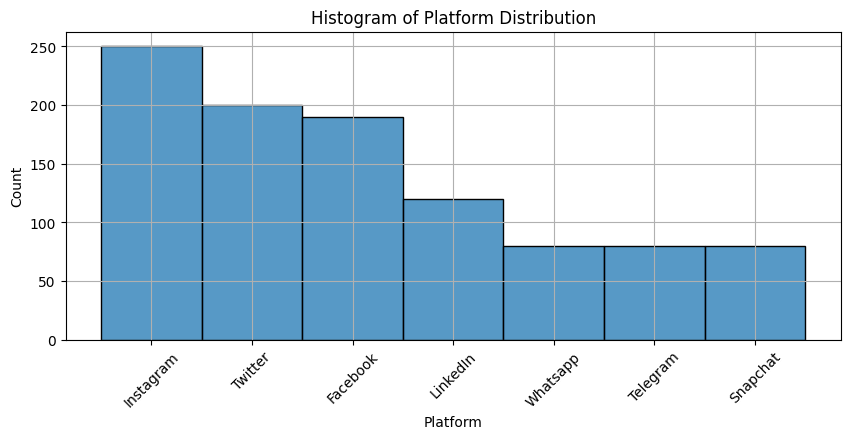


           count unique        top freq
Platform                              
Facebook    190      4    Neutral   70
Instagram   250      5  Happiness  170
LinkedIn    120      4    Boredom   70
Snapchat     80      4    Sadness   30
Telegram     80      5    Neutral   30
Twitter     200      6      Anger   80
Whatsapp     80      4      Anger   30

Contingency Table:

Platform          Facebook  Instagram  LinkedIn  Snapchat  Telegram  Twitter  \
Dominant_Emotion                                                               
Anger                    0         10         0         0        10       80   
Anxiety                 50         30        20        20        10       20   
Boredom                 40          0        70         0        10       20   
Happiness                0        170         0        10         0       10   
Neutral                 70         20        20        20        30       20   
Sadness                 30         20        10        30        2

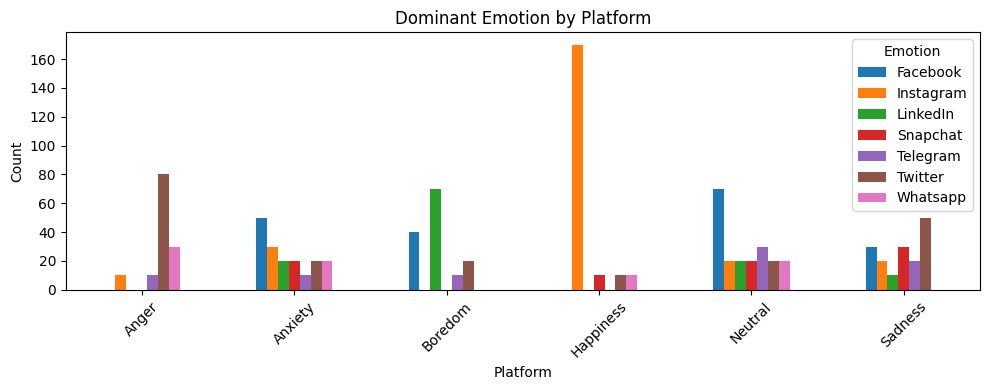

In [119]:
# Histogram for the distribution of platforms
plt.figure(figsize=(10, 4))
sns.histplot(data=social_df, x='Platform', discrete=True, kde=False)
plt.title('Histogram of Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Group the data by race
grouped_data = social_df.groupby('Platform')['Dominant_Emotion']

# Calculate descriptive statistics, I will be using this grouping method for my final project as well
descriptive_stats = grouped_data.describe()

# Contingency table for Dominant Emotion by Platform
contingency_table_platform_emotion = pd.crosstab(social_df['Dominant_Emotion'], social_df['Platform'])

# Perform the Chi-Square test - chi tests are used to determine whether there is a significant association between two categorical variables.  
chi2, p, dof, ex = stats.chi2_contingency(contingency_table_platform_emotion)

# Bar chart Dominant Emotion by Platform
contingency_table_platform_emotion.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Display results
print("\n", descriptive_stats)
print("\nContingency Table:\n")
print(contingency_table_platform_emotion, "\n")

# Print results
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}, degrees of freedom = {dof}", "\n")
# Currently Chi-Square is incorrect

**Conduct T-Tests for Dominant Emotion Per Platform**

In [117]:
# Get unique dominant emotions and platforms
emotions = social_df['Dominant_Emotion'].unique()
platforms = social_df['Platform'].unique()

# Function to perform pairwise t-tests - need to do this form of testing to 
def pairwise_t_tests(data, group_col, value_col):
    results = {}
    groups = data[group_col].unique()
    for group1, group2 in combinations(groups, 2):
        group1_data = data[data[group_col] == group1][value_col].dropna()
        group2_data = data[data[group_col] == group2][value_col].dropna()
        t_stat, p_val = stats.ttest_ind(group1_data, group2_data)
        results[(group1, group2)] = (t_stat, p_val)
    return results

# Perform t-tests for each emotion
t_test_results = {}
for emotion in emotions:
    emotion_data = social_df[social_df['Dominant_Emotion'] == emotion]
    t_test_results[emotion] = pairwise_t_tests(emotion_data, 'Platform', 'Age')

# Display the results
for emotion, results in t_test_results.items():
    print(f"Results for {emotion}:")
    for platforms, (t_stat, p_val) in results.items():
        print(f"  {platforms}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    print()


Results for Happiness:
  ('Instagram', 'Twitter'): t-statistic = -0.2485, p-value = 0.8040
  ('Instagram', 'Snapchat'): t-statistic = 3.1309, p-value = 0.0020
  ('Instagram', 'Whatsapp'): t-statistic = -6.1624, p-value = 0.0000
  ('Twitter', 'Snapchat'): t-statistic = inf, p-value = 0.0000
  ('Twitter', 'Whatsapp'): t-statistic = -inf, p-value = 0.0000
  ('Snapchat', 'Whatsapp'): t-statistic = -inf, p-value = 0.0000

Results for Anger:
  ('Twitter', 'Whatsapp'): t-statistic = -1.0603, p-value = 0.2914
  ('Twitter', 'Instagram'): t-statistic = -9.2790, p-value = 0.0000
  ('Twitter', 'Telegram'): t-statistic = -0.8754, p-value = 0.3838
  ('Whatsapp', 'Instagram'): t-statistic = -4.9425, p-value = 0.0000
  ('Whatsapp', 'Telegram'): t-statistic = 0.0000, p-value = 1.0000
  ('Instagram', 'Telegram'): t-statistic = inf, p-value = 0.0000

Results for Neutral:
  ('Facebook', 'LinkedIn'): t-statistic = -1.9930, p-value = 0.0494
  ('Facebook', 'Twitter'): t-statistic = 1.9092, p-value = 0.0595
 

### Facebook Data

**Filter to Facebook Platform**

In [110]:
# Filter the data for the Facebook platform
facebook_subset = social_df[social_df['Platform'] == 'Facebook']

facebook_subset.describe()
# Formulate Hypotheses
# H0: There is no significant relationship between age and dominant emotion on the Facebook platform.
# H1: There is a significant relationship between age and dominant emotion on the Facebook platform.

,User_ID,Age,Daily_Usage_Minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,496.684211,26.263158,72.105263,1.947368,19.726316,8.663158,16.694737
std,289.397852,3.330826,19.471577,1.148898,7.997939,3.757491,4.606353
min,3.000000,21.000000,40.000000,1.000000,5.000000,2.000000,10.000000
25%,245.000000,23.000000,60.000000,1.000000,12.000000,5.000000,12.000000
50%,500.000000,26.000000,70.000000,2.000000,20.000000,8.500000,18.000000
75%,743.000000,29.000000,85.000000,2.000000,27.000000,12.000000,20.000000
max,997.000000,33.000000,110.000000,6.000000,35.000000,16.000000,25.000000


**Describe Targeted/Grouped Data - Dominant Emotion by Age**

In [111]:
# Descriptive Statistics
cross_reference_age_emotion = facebook_subset.groupby('Dominant_Emotion')['Age'].describe()
print("Cross-reference of Age with Dominant Emotion on Facebook:")
print(cross_reference_age_emotion)

Cross-reference of Age with Dominant Emotion on Facebook:
                  count       mean       std   min   25%   50%   75%   max
Dominant_Emotion                                                          
Anxiety            50.0  28.400000  2.602981  26.0  26.0  28.0  29.0  33.0
Boredom            40.0  28.000000  1.012739  27.0  27.0  28.0  29.0  29.0
Neutral            70.0  24.142857  3.823216  21.0  21.0  22.0  29.0  31.0
Sadness            30.0  25.333333  0.958927  24.0  24.0  26.0  26.0  26.0


Box Plot

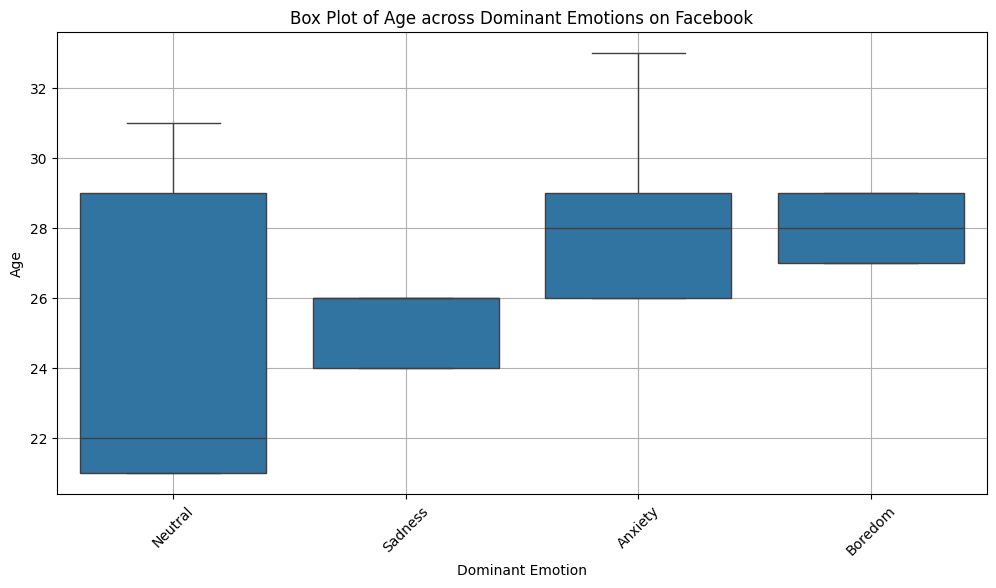

In [112]:
# Box Plot of Age for each Dominant Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(data=facebook_subset, x='Dominant_Emotion', y='Age')
plt.title('Box Plot of Age across Dominant Emotions on Facebook')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Bar Plot

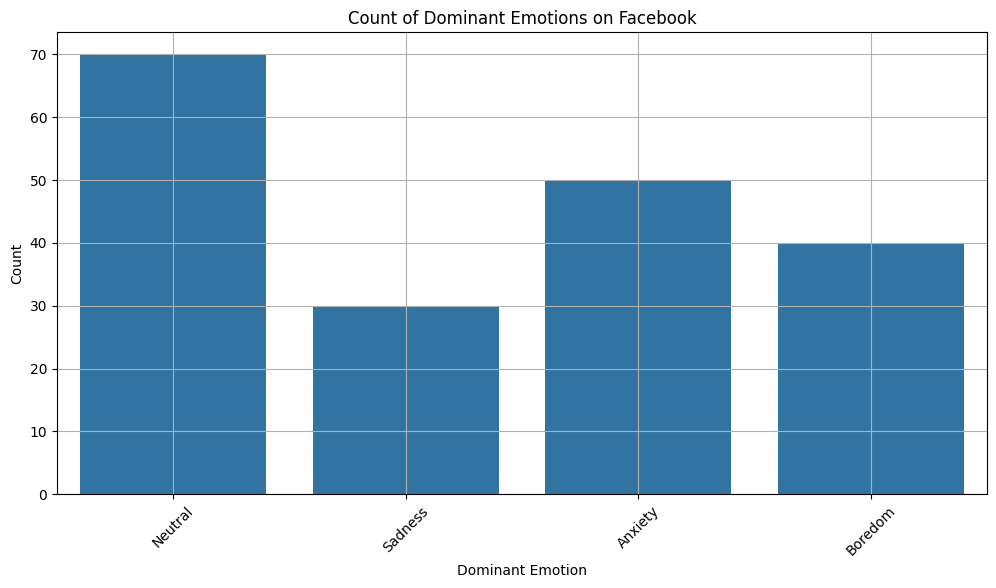

In [113]:
# Bar Plot of the Count of Each Dominant Emotion
plt.figure(figsize=(12, 6))
sns.countplot(data=facebook_subset, x='Dominant_Emotion')
plt.title('Count of Dominant Emotions on Facebook')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Chi-Square Test
**Flagging this is incorrect: p-values are off**


Contingency Table:
Dominant_Emotion  Anxiety  Boredom  Neutral  Sadness
Age                                                 
21                      0        0       20        0
22                      0        0       20        0
23                      0        0       10        0
24                      0        0        0       10
26                     20        0        0       20
27                      0       20        0        0
28                     10        0        0        0
29                     10       20       10        0
31                      0        0       10        0
33                     10        0        0        0
Chi-Square Test: chi2 = 372.30952380952385, p-value = 2.1101673144632784e-62 



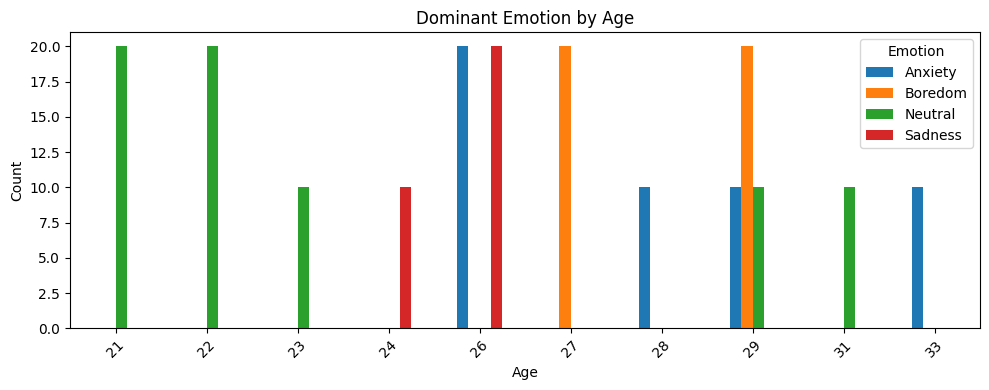

In [114]:
# Chi-Square Test
# Create a contingency table
contingency_table = pd.crosstab(facebook_subset['Dominant_Emotion'], facebook_subset['Age'])
contingency_table_flipped = pd.crosstab(facebook_subset['Age'], facebook_subset['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the results
print("\nContingency Table:")
print(contingency_table_flipped)

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}" , "\n")


T-Tests

In [115]:
# T-Test
# Perform pairwise T-tests for age across different dominant emotions
emotions = facebook_subset['Dominant_Emotion'].unique()

# Conduct pairwise T-tests
t_test_results = {}
for emotion1, emotion2 in combinations(emotions, 2):
    group1 = facebook_subset[facebook_subset['Dominant_Emotion'] == emotion1]['Age'].dropna()
    group2 = facebook_subset[facebook_subset['Dominant_Emotion'] == emotion2]['Age'].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    t_test_results[(emotion1, emotion2)] = (t_stat, p_val)

print("Pairwise T-test results:")
for key, value in t_test_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

Pairwise T-test results:
('Neutral', 'Sadness'): t-statistic = -1.6785074633458787, p-value = 0.09643421544110535
('Neutral', 'Anxiety'): t-statistic = -6.821150743890093, p-value = 4.1064853963377626e-10
('Neutral', 'Boredom'): t-statistic = -6.24541446843891, p-value = 8.529373399628306e-09
('Sadness', 'Anxiety'): t-statistic = -6.192542583068983, p-value = 2.5836414908229215e-08
('Sadness', 'Boredom'): t-statistic = -11.150912838994719, p-value = 5.274756515212388e-17
('Anxiety', 'Boredom'): t-statistic = 0.9171145859050562, p-value = 0.3615892421659599


## Section 3: Model Selection and Analysis